In [1]:
from FUNCTIONS import *
%matplotlib inline

import sklearn.discriminant_analysis
random.seed(42)

TensorFlow Version:  2.1.0


Total Events: 4000
Total Labels: 4000

Shape:  (4000, 1600)

Train:  (2788, 1600) (2788,)
Val:  (612, 1600) (612,)
Test:  (600, 1600) (600,)
 


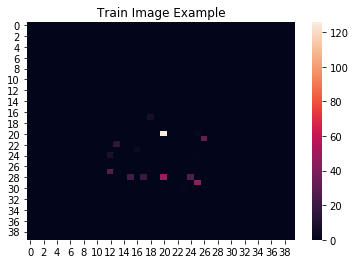

In [2]:
# MAIN
data_s = np.array(pd.read_csv('data/data_s_180k').iloc[:, 1:])
data_b = np.array(pd.read_csv('data/data_b_180k').iloc[:, 1:])

# Slice & Save
events_no = int(1e5)
events_no = 2000
data_s = data_s[0:events_no*40, 0:40]
data_b = data_b[0:events_no*40, 0:40]

# # Save Datasets
# pd.DataFrame(data_s).to_csv('data_s_1000')
# pd.DataFrame(data_b).to_csv('data_b_1000')

train_examples, train_labels, val_examples, val_labels, test_examples, test_labels = preprocess_ML_sklearn(data_s, data_b)




In [3]:

random_forest = RandomForestClassifier(random_state=42, n_jobs=-1)
svm = SVC(random_state=42)
KNN = sklearn.neighbors.KNeighborsClassifier()
naive_bayes = MultinomialNB()
BDT = sklearn.ensemble.GradientBoostingClassifier()
bagging = BaggingClassifier(random_state=42, n_jobs=-1)

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import time


# Naive Bayes
alpha = [0, 0.001, 0.01, 0.1, 0.5, 1, 1.5, 2, 5, 10, 15, 20, 30, 40, 50, 80, 100, 150]

# Random Forests
bootstrap = [True, False]
criterion = ['gini', 'entropy']
n_estimators_rf = [10, 50, 100, 200, 500, 3000]
max_depth_rf = [10, 20, 50, 100, None]
max_features_rf = ['auto', 'sqrt']
min_samples_leaf_rf = [1, 2, 4, 15, 40]
min_samples_split_rf = [2, 5, 10, 30, 50]


# Hyperparameters
naive_bayes_parameters = {'alpha': alpha}
random_forest_parameters = {'bootstrap': bootstrap, 'criterion': criterion, 'max_features':max_features_rf, 'n_estimators': n_estimators_rf, 'max_depth': max_depth_rf, 'min_samples_leaf': min_samples_leaf_rf, 'min_samples_split': min_samples_split_rf}

# Scoring object using accuracy
scorer = make_scorer(accuracy_score)


clfs_param =[(naive_bayes, naive_bayes_parameters), 
             (random_forest, random_forest_parameters)]

In [6]:
# Create list to store models
models = []
unopt_accuracy = []
accuracies = []

# Perform grid search
for clf, parameter in clfs_param:
    print('\n{}\n'.format(clf.__class__.__name__))
    
    grid_obj = GridSearchCV(clf, parameter, scoring=scorer, n_jobs = 6)
    
    # Perform grid search
    start = time.time()
    grid_fit = grid_obj.fit(train_examples, train_labels)
    end = time.time()
    print('Time to tune: {}s'.format(round(end - start), 2))
    
    # Get best estimator
    best_clf = grid_fit.best_estimator_
    models.append(best_clf)
    
    # Make predictions using the unoptimized and model
    start = time.time()
    predictions = (clf.fit(train_examples, train_labels)).predict(val_examples)
    best_predictions = best_clf.predict(val_examples)
    
    predictions_train = (clf.fit(train_examples, train_labels)).predict(train_examples)
    best_predictions_train = best_clf.predict(train_examples)
    end = time.time()
    print('Time to fit-predict: {}s\n'.format(round(end - start), 2))
    
    # Check hyperparameters
    print('Unoptimised: {}\n'.format(clf.get_params(deep = True)))
    print('Optimised: {}\n'.format(best_clf.get_params(deep = True)))
    
    # Print Results
    print("\nUnoptimised-accuracy-training: {:.4f}".format(accuracy_score(train_labels, predictions_train)))
    print("Optimised-accuracy-training: {:.4f}".format(accuracy_score(train_labels, best_predictions_train)))
    
    print("\nUnoptimised-accuracy-validation: {:.4f}".format(accuracy_score(val_labels, predictions)))
    print("Optimised-accuracy-validation: {:.4f}".format(accuracy_score(val_labels, best_predictions)))
    
    print('\n\n=============================================================================================')
    
    unopt_accuracy.append(accuracy_score(val_labels, predictions))
    accuracies.append(accuracy_score(val_labels, best_predictions))
    
print('All unoptimised f1 (validation): {}'.format(unopt_f1))
print('Best unoptimised f1 (validation): {}\n'.format(max(unopt_f1)))
print('All optimised f1 (validation): {}'.format(f1))
print('Best optimised f1 (validation): {}'.format(max(f1)))


MultinomialNB

Time to tune: 2s
Time to fit-predict: 0s

Unoptimised: {'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

Optimised: {'alpha': 15, 'class_prior': None, 'fit_prior': True}


Unoptimised-accuracy-training: 0.7844
Optimised-accuracy-training: 0.7669

Unoptimised-accuracy-validation: 0.7075
Optimised-accuracy-validation: 0.7222



RandomForestClassifier

Time to tune: 31639s


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Time to fit-predict: 1s

Unoptimised: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

Optimised: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 30, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


Unoptimised-accuracy-training: 1.0000
Optimised-accuracy-training: 0.9046

Unoptimised-accuracy-validation: 0.

NameError: name 'unopt_f1' is not defined

In [ ]:
cmx